# <center> Lab13: Image Classification using CNN for CIFAR-10 Dataset </center>

### 205229103

### Arzoo Sah

In this lab, you will work with the CIFAR-10 Dataset. This is a well-known dataset for image 
classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. 
There are 50000 training images and 10000 test images.


The 10 classes: Airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

**1. Import libraries**

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import random
import numpy as np
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

**2. Load your data and print the shape of training and test samples**

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170508288/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
50000 train samples
10000 test samples


**3. Print the shape of one image (is it 32 x 32 x 3 numpy array ?)**

In [ ]:
x_train[444].shape

(32, 32, 3)

**4. Display one image using imshow() function**

[9]


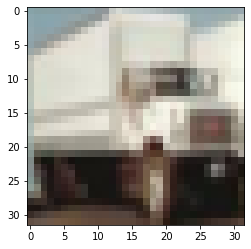

In [ ]:
print(y_train[444])
plt.imshow(x_train[444])

**5. Convert y_train and y_test into categorical values**

In [ ]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
class_names = ['airplane','car','bird','dog','cat','deer','frog','horse','ship','truck']

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
class_names[np.argmax(y_train[444])]

'truck'

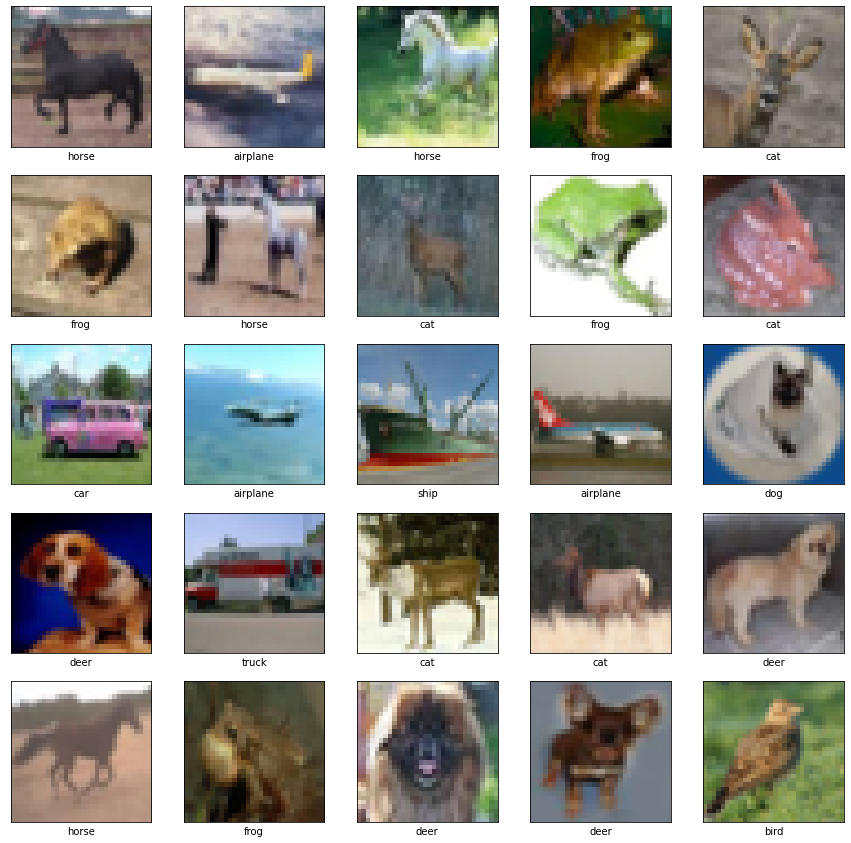

In [ ]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    rand_no = random.randint(0,len(x_train))     
    plt.imshow(x_train[rand_no])
    plt.xlabel(class_names[np.argmax(y_train[rand_no])])

**6. Convert train data into float and scale**

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

**7. Build your first CNN**

In [ ]:
INPUT_SHAPE = (32,32,3)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2),activation='relu', padding='same', input_shape=INPUT_SHAPE))

model.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2), activation='relu', padding='same', input_shape=INPUT_SHAPE))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(10, activation='softmax'))

**8. Print summary and verify your configuration**

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 16, 16, 32)        2432      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)              

**9. Compile and fit and validate your model with the following parameters**

In [ ]:
# compile model
model.compile(optimizer=RMSprop(0.00005,1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=32,epochs=15,verbose=2,validation_split=0.2,shuffle=True)

Epoch 1/15
1250/1250 - 36s - loss: 2.1497 - accuracy: 0.2117 - val_loss: 1.8992 - val_accuracy: 0.3384
Epoch 2/15
1250/1250 - 6s - loss: 1.8696 - accuracy: 0.3241 - val_loss: 1.7455 - val_accuracy: 0.3889
Epoch 3/15
1250/1250 - 5s - loss: 1.7592 - accuracy: 0.3648 - val_loss: 1.6705 - val_accuracy: 0.4063
Epoch 4/15
1250/1250 - 6s - loss: 1.6901 - accuracy: 0.3873 - val_loss: 1.6274 - val_accuracy: 0.4230
Epoch 5/15
1250/1250 - 5s - loss: 1.6357 - accuracy: 0.4049 - val_loss: 1.5520 - val_accuracy: 0.4441
Epoch 6/15
1250/1250 - 6s - loss: 1.5902 - accuracy: 0.4247 - val_loss: 1.5200 - val_accuracy: 0.4562
Epoch 7/15
1250/1250 - 5s - loss: 1.5575 - accuracy: 0.4338 - val_loss: 1.4846 - val_accuracy: 0.4691
Epoch 8/15
1250/1250 - 6s - loss: 1.5335 - accuracy: 0.4449 - val_loss: 1.5038 - val_accuracy: 0.4676
Epoch 9/15
1250/1250 - 5s - loss: 1.5143 - accuracy: 0.4516 - val_loss: 1.4476 - val_accuracy: 0.4889
Epoch 10/15
1250/1250 - 6s - loss: 1.4964 - accuracy: 0.4603 - val_loss: 1.4240 -

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3327860832214355
Test accuracy: 0.5260999798774719


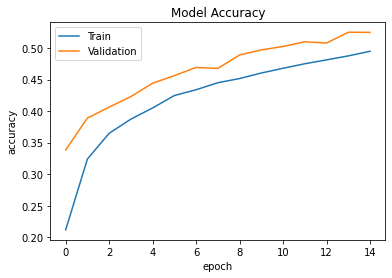

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

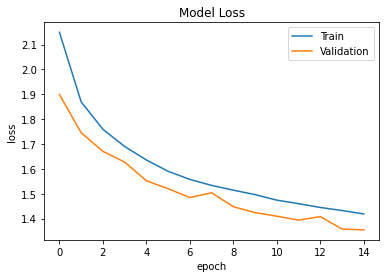

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

**10. Exercise**

#### 1. Build a more complicated model with the following pattern: Conv -> Conv-> MaxPool -> Conv-> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

#### 2. Use strides of 1 for all convolutional layers.

#### 3. How many parameters does your model have? How does that compare to the previous model?

#### 4. Train it for 5 epochs. What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

#### 5. Try different structures and run times, and see how accurate your model can be.


In [ ]:
INPUT_SHAPE = (32,32,3)

model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1),activation='relu', padding='same', input_shape=INPUT_SHAPE))

model1.add(Conv2D(filters=32, kernel_size=(5,5),strides=(1,1), activation='relu', padding='same', input_shape=INPUT_SHAPE))

model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1),activation='relu', padding='same', input_shape=INPUT_SHAPE))

model1.add(Conv2D(filters=32, kernel_size=(5,5),strides=(1,1), activation='relu', padding='same', input_shape=INPUT_SHAPE))

model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(512, activation='relu'))

model1.add(Dense(10, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [ ]:
model1.compile(optimizer=RMSprop(0.00005,1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history1=model1.fit(x_train,y_train,batch_size=32,epochs=5,verbose=2,validation_split=0.2,shuffle=True)

Epoch 1/5
1250/1250 - 19s - loss: 1.8648 - accuracy: 0.3284 - val_loss: 1.6414 - val_accuracy: 0.4137
Epoch 2/5
1250/1250 - 17s - loss: 1.6030 - accuracy: 0.4274 - val_loss: 1.5494 - val_accuracy: 0.4483
Epoch 3/5
1250/1250 - 18s - loss: 1.5051 - accuracy: 0.4625 - val_loss: 1.5008 - val_accuracy: 0.4590
Epoch 4/5
1250/1250 - 18s - loss: 1.4412 - accuracy: 0.4865 - val_loss: 1.3791 - val_accuracy: 0.5093
Epoch 5/5
1250/1250 - 18s - loss: 1.3944 - accuracy: 0.5058 - val_loss: 1.3911 - val_accuracy: 0.5137


In [ ]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3796414136886597
Test accuracy: 0.5148000121116638


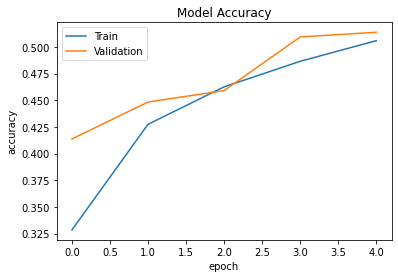

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

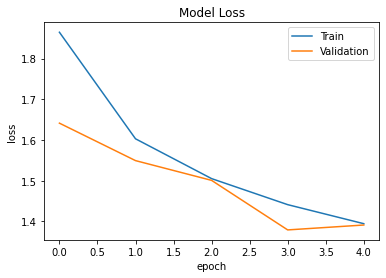

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
INPUT_SHAPE = (32,32,3)

model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),activation='tanh', padding='valid', input_shape=INPUT_SHAPE))

model2.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1,1), activation='tanh', padding='valid', input_shape=INPUT_SHAPE))

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(rate=0.3))

model2.add(Flatten())

model2.add(Dense(512, activation='tanh'))
model2.add(Dense(256, activation='tanh'))

model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               3211776   
_________________________________________________________________
dense_5 (Dense)              (None, 256)              

In [ ]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x_train,y_train,batch_size=32,epochs=10,verbose=2,validation_split=0.2)

Epoch 1/10
1250/1250 - 11s - loss: 1.4552 - accuracy: 0.4897 - val_loss: 1.2377 - val_accuracy: 0.5715
Epoch 2/10
1250/1250 - 10s - loss: 1.1102 - accuracy: 0.6106 - val_loss: 1.0985 - val_accuracy: 0.6133
Epoch 3/10
1250/1250 - 10s - loss: 0.9503 - accuracy: 0.6678 - val_loss: 0.9986 - val_accuracy: 0.6461
Epoch 4/10
1250/1250 - 10s - loss: 0.8093 - accuracy: 0.7185 - val_loss: 1.0288 - val_accuracy: 0.6516
Epoch 5/10
1250/1250 - 9s - loss: 0.6801 - accuracy: 0.7606 - val_loss: 1.0362 - val_accuracy: 0.6548
Epoch 6/10
1250/1250 - 10s - loss: 0.5599 - accuracy: 0.8049 - val_loss: 1.0149 - val_accuracy: 0.6718
Epoch 7/10
1250/1250 - 10s - loss: 0.4624 - accuracy: 0.8400 - val_loss: 1.0668 - val_accuracy: 0.6689
Epoch 8/10
1250/1250 - 10s - loss: 0.3907 - accuracy: 0.8633 - val_loss: 1.1199 - val_accuracy: 0.6675
Epoch 9/10
1250/1250 - 9s - loss: 0.3381 - accuracy: 0.8828 - val_loss: 1.1972 - val_accuracy: 0.6625
Epoch 10/10
1250/1250 - 10s - loss: 0.3168 - accuracy: 0.8873 - val_loss: 1

In [ ]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3315776586532593
Test accuracy: 0.638700008392334


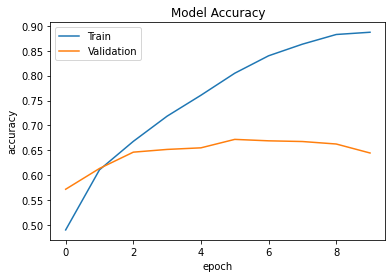

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

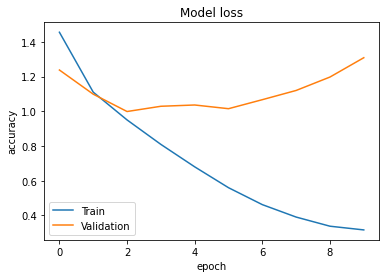

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
INPUT_SHAPE = (32,32,3)

model3 = Sequential()

model3.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),activation='tanh', padding='same', input_shape=INPUT_SHAPE))

model3.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1,1), activation='tanh', padding='same', input_shape=INPUT_SHAPE))

model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Dropout(rate=0.3))

model3.add(Flatten())

model3.add(Dense(512, activation='tanh'))
model3.add(Dropout(rate=0.2))

model3.add(Dense(128, activation='tanh'))
model3.add(Dropout(rate=0.2))

model3.add(Dense(10, activation='softmax'))

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)              

In [ ]:
model3.compile(optimizer=RMSprop(0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history3 = model3.fit(x_train,y_train,batch_size=32,epochs=30,verbose=2,validation_split=0.2)

Epoch 1/30
1250/1250 - 16s - loss: 1.5996 - accuracy: 0.4407 - val_loss: 1.2309 - val_accuracy: 0.5619
Epoch 2/30
1250/1250 - 15s - loss: 1.1730 - accuracy: 0.5918 - val_loss: 1.0864 - val_accuracy: 0.6157
Epoch 3/30
1250/1250 - 15s - loss: 1.0111 - accuracy: 0.6479 - val_loss: 1.0560 - val_accuracy: 0.6332
Epoch 4/30
1250/1250 - 15s - loss: 0.9095 - accuracy: 0.6842 - val_loss: 1.0333 - val_accuracy: 0.6451
Epoch 5/30
1250/1250 - 15s - loss: 0.8313 - accuracy: 0.7163 - val_loss: 1.0174 - val_accuracy: 0.6537
Epoch 6/30
1250/1250 - 15s - loss: 0.7710 - accuracy: 0.7340 - val_loss: 0.9941 - val_accuracy: 0.6602
Epoch 7/30
1250/1250 - 15s - loss: 0.7137 - accuracy: 0.7532 - val_loss: 0.9935 - val_accuracy: 0.6637
Epoch 8/30
1250/1250 - 15s - loss: 0.6702 - accuracy: 0.7688 - val_loss: 1.0034 - val_accuracy: 0.6695
Epoch 9/30
1250/1250 - 15s - loss: 0.6375 - accuracy: 0.7782 - val_loss: 0.9816 - val_accuracy: 0.6724
Epoch 10/30
1250/1250 - 15s - loss: 0.6081 - accuracy: 0.7895 - val_loss:

In [ ]:
score = model3.evaluate(x_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2488545179367065
Test accuracy: 0.6606000065803528


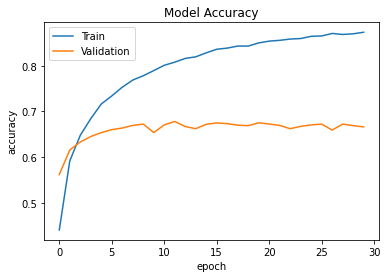

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

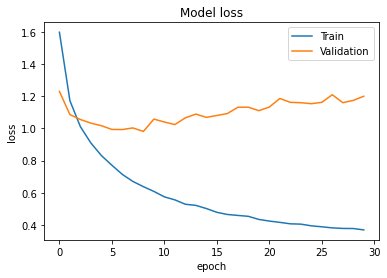

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()